In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [ ]:
# 데이터 가져오기
ticker = "BTC-USD"
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2024, 12, 31)
data = yf.download(ticker, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [ ]:
data.dropna(inplace=True)  # 결측값 제거
data.columns = data.columns.droplevel(level=1)
data["Next Low"] = data["Low"].shift(-1)
data["Next Close"] = data["Close"].shift(-1)
data.tail()

Price,Close,High,Low,Open,Volume,Next Low,Next Close
Date,,,,,,,
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,93310.742188,94164.859375
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,94014.289062,95163.929688
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,92881.789062,93530.226562
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,91317.132812,92643.210938
2024-12-30,92643.210938,94903.320312,91317.132812,93527.195312,56188003691,NaN,NaN


In [ ]:
data["Y"] = (data["Next Close"] - data["Close"]) / data["Close"] * 100

In [ ]:
data.loc[data["Next Low"] < data["Low"], "Y"] = -2
data

Price,Close,High,Low,Open,Volume,Next Low,Next Close,Y
Date,,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,413.104004,424.440002,-2.000000
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,384.532013,394.795990,-2.000000
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,389.882996,408.903992,3.573492
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,393.181000,398.821014,-2.465854
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,397.130005,402.152008,0.835210
...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,93310.742188,94164.859375,-2.000000
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,94014.289062,95163.929688,1.060980
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,92881.789062,93530.226562,-2.000000


In [ ]:
data.loc[data["Y"] < -2, "Y"] = -2
data

Price,Close,High,Low,Open,Volume,Next Low,Next Close,Y
Date,,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,413.104004,424.440002,-2.000000
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,384.532013,394.795990,-2.000000
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,389.882996,408.903992,3.573492
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,393.181000,398.821014,-2.000000
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,397.130005,402.152008,0.835210
...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,93310.742188,94164.859375,-2.000000
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,94014.289062,95163.929688,1.060980
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,92881.789062,93530.226562,-2.000000


In [ ]:
data["close_open"] = (data["Close"] - data["Open"]) / (data["High"] - data["Low"])
data["high_open"] = (data["High"] - data["Open"]) / (data["High"] - data["Low"])
data["high_close"] = (data["High"] - data["Close"]) / (data["High"] - data["Low"])
data["open_low"] = (data["Open"] - data["Low"]) / (data["High"] - data["Low"])
data["close_low"] = (data["Close"] - data["Low"]) / (data["High"] - data["Low"])
data

Price,Close,High,Low,Open,Volume,Next Low,Next Close,Y,close_open,high_open,high_close,open_low,close_low
Date,,,,,,,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,413.104004,424.440002,-2.000000,-0.541518,0.146648,0.688166,0.853352,0.311834
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,384.532013,394.795990,-2.000000,-0.740927,0.000000,0.740927,1.000000,0.259073
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,389.882996,408.903992,3.573492,-0.676790,0.086183,0.762973,0.913817,0.237027
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,393.181000,398.821014,-2.000000,0.425912,0.856642,0.430731,0.143358,0.569269
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,397.130005,402.152008,0.835210,-0.481371,0.225565,0.706936,0.774435,0.293064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,93310.742188,94164.859375,-2.000000,-0.737816,0.123639,0.861454,0.876361,0.138546
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,94014.289062,95163.929688,1.060980,-0.386566,0.399053,0.785619,0.600947,0.214381
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,92881.789062,93530.226562,-2.000000,0.664022,0.903481,0.239459,0.096519,0.760541


In [ ]:
train_data = data.loc['2014-09-17':'2024-01-01',
                    ['close_open', 'high_open', 'high_close', 'open_low', 'close_low']]
train_data_y = data.loc['2014-09-17':'2024-01-01',
                    ['Y']]

In [ ]:
train_data

Price,close_open,high_open,high_close,open_low,close_low
Date,,,,,
2014-09-17,-0.541518,0.146648,0.688166,0.853352,0.311834
2014-09-18,-0.740927,0.000000,0.740927,1.000000,0.259073
2014-09-19,-0.676790,0.086183,0.762973,0.913817,0.237027
2014-09-20,0.425912,0.856642,0.430731,0.143358,0.569269
2014-09-21,-0.481371,0.225565,0.706936,0.774435,0.293064
...,...,...,...,...,...
2023-12-28,-0.565420,0.226467,0.791886,0.773533,0.208114
2023-12-29,-0.303037,0.299765,0.602802,0.700235,0.397198
2023-12-30,0.063380,0.479008,0.415627,0.520992,0.584373


In [ ]:
train_data_y

Price,Y
Date,
2014-09-17,-2.000000
2014-09-18,-2.000000
2014-09-19,3.573492
2014-09-20,-2.000000
2014-09-21,0.835210
...,...
2023-12-28,-2.000000
2023-12-29,0.136582
2023-12-30,0.256862


In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

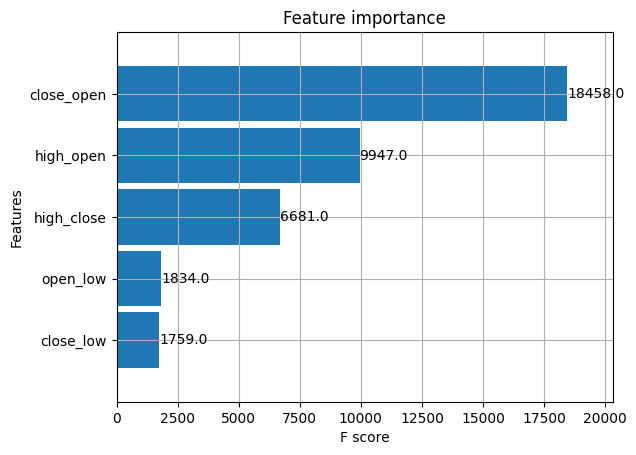

In [ ]:
# xgboost로 학습
xg_model = XGBRegressor(n_estimators=1000)
xg_model.fit(train_data, train_data_y, verbose=False)

plot_importance(xg_model, height=0.9)

In [ ]:
test_data = data.loc['2024-01-02':'2024-12-01',
                    ['close_open', 'high_open', 'high_close', 'open_low', 'close_low']]
test_data_y = data.loc['2024-01-02':'2024-12-01',
                    ['Y']]

In [ ]:
test_data_y

,Y
Date,
2024-01-02,-2.000000
2024-01-03,3.108058
2024-01-04,-0.039001
2024-01-05,-0.392857
2024-01-06,-0.104793
...,...
2024-11-27,-0.323108
2024-11-28,1.891279
2024-11-29,-1.038839


In [ ]:
predicts = xg_model.predict(test_data)

In [ ]:
predicts_df = pd.DataFrame({"pred": predicts, "real": test_data_y["Y"]})

In [ ]:
predicts_df

,pred,real
Date,,
2024-01-02,-0.910692,-2.000000
2024-01-03,-0.677587,3.108058
2024-01-04,0.775174,-0.039001
2024-01-05,3.393640,-0.392857
2024-01-06,-0.608721,-0.104793
...,...,...
2024-11-27,4.926807,-0.323108
2024-11-28,-0.436915,1.891279
2024-11-29,0.644524,-1.038839


<Axes: xlabel='Date'>

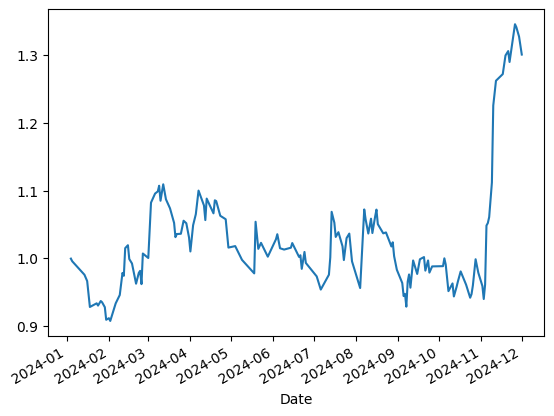

In [ ]:
results = predicts_df[predicts_df["pred"] > 0]["real"] / 100.0 + 1
results.cumprod().plot()

<Axes: xlabel='Date'>

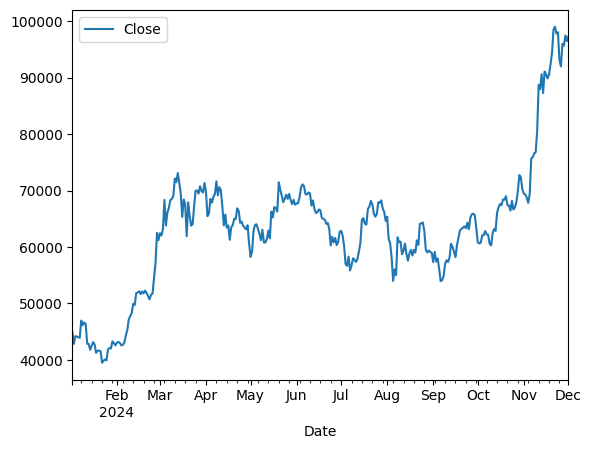

In [ ]:
data.loc['2024-01-02':'2024-12-01',
                    ['Close']].plot()